NLP PROJECT - EMOTION CLASSIFIER - JIHYO PARK, PAVAN EDA

IMPORT LIBRARIES

In [231]:
import pandas as pd
import numpy as np
import nltk
import copy
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from keras.utils import plot_model

#from tensorflow.keras.optimizers import Adam
#from tensorflow.keras.losses import sparse_categorical_crossentropy

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/jihyo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/jihyo/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/jihyo/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/jihyo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

LOAD CSV FILE & DATA CLEANING

In [232]:
# LOAD THE CSV FILE
emotion_file_path = "text.csv"
emotion_data = pd.read_csv(emotion_file_path)

# HEAD
emotion_data.head()

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4


In [233]:
emotion_data.text

0             i just feel really helpless and heavy hearted
1         ive enjoyed being able to slouch about relax a...
2         i gave up my internship with the dmrg and am f...
3                                i dont know i feel so lost
4         i am a kindergarten teacher and i am thoroughl...
                                ...                        
416804    i feel like telling these horny devils to find...
416805    i began to realize that when i was feeling agi...
416806    i feel very curious be why previous early dawn...
416807    i feel that becuase of the tyranical nature of...
416808    i think that after i had spent some time inves...
Name: text, Length: 416809, dtype: object

In [234]:
# CHECK IF THERE ARE ANY DUPLICATES
emotion_data.duplicated().sum()

0

In [235]:
emotion_data = emotion_data.drop(columns='Unnamed: 0')

DATA VISUALIZATION

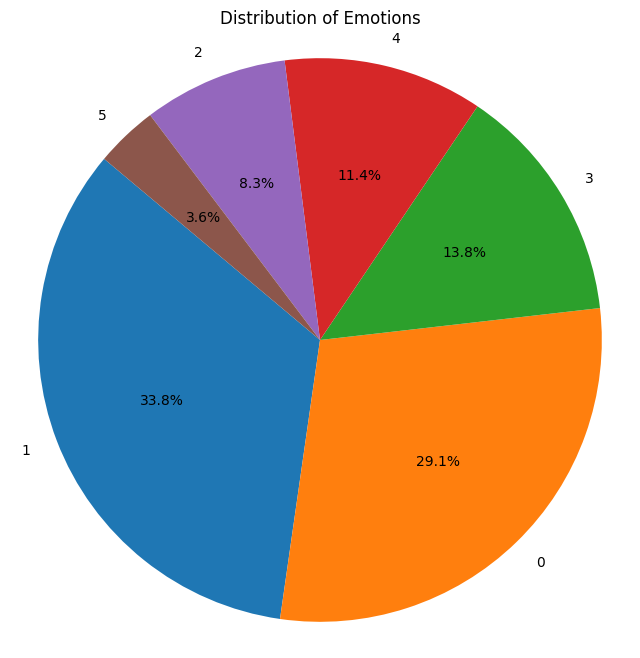

In [236]:
# Number of each label
label_counts = emotion_data['label'].value_counts()

# Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Emotions')
plt.axis('equal')
plt.show()

POST TAGS AND TOKENIZERS

In [237]:
# POST TAGS AND TOKENIZERS
postag = dict()

tokens = copy.deepcopy(emotion_data.text)

for i in range(30):
   # has tokenizers
   tokens[i] = nltk.word_tokenize(emotion_data.text[i])

   # post tags
   postag[i] = nltk.pos_tag(tokens[i])
   
#postag


SENTIMENT ANALYSIS

In [238]:
sia = SentimentIntensityAnalyzer()

# Calculating polarity scores of each sentence
e_scores = dict()

for i in range(30):
    e_scores[i] = sia.polarity_scores(emotion_data.text[i])

#e_scores

HEATMAP VISUALIZATION WITH POLARITY SCORES

In [239]:
neg = []
neu = []
pos = []
comp = []

for i in range(30):
    neg.append(e_scores[i]['neg'])
    neu.append(e_scores[i]['neu'])
    pos.append(e_scores[i]['pos'])
    comp.append(e_scores[i]['compound'])
    
pscore_array = [neg, neu, pos, comp]
classes = ["negative","neutral", "positive", "compound"]
series = (pd.DataFrame(pscore_array,classes))
np_array = series
np_array

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
negative,0.3540,0.0540,0.2550,0.4280,0.205,0.4110,0.000,0.1010,0.1240,0.3500,...,0.1530,0.0000,0.0000,0.2350,0.2080,0.1910,0.0000,0.1000,0.0,0.0000
neutral,0.6460,0.7860,0.6380,0.5720,0.795,0.5890,0.717,0.5660,0.8760,0.4300,...,0.6900,0.6300,0.4900,0.6120,0.6600,0.3700,0.5970,0.7570,1.0,0.5520
positive,0.0000,0.1590,0.1060,0.0000,0.000,0.0000,0.283,0.3330,0.0000,0.2200,...,0.1580,0.3700,0.5100,0.1530,0.1320,0.4380,0.4030,0.1430,0.0,0.4480
compound,-0.5095,0.6221,-0.4767,-0.4572,-0.759,-0.5413,0.807,0.8126,-0.1779,-0.1321,...,0.0258,0.7792,0.9677,-0.1531,-0.5462,0.4588,0.6597,0.2382,0.0,0.8074


Text(220.72222222222223, 0.5, 'Polarity Score Category')

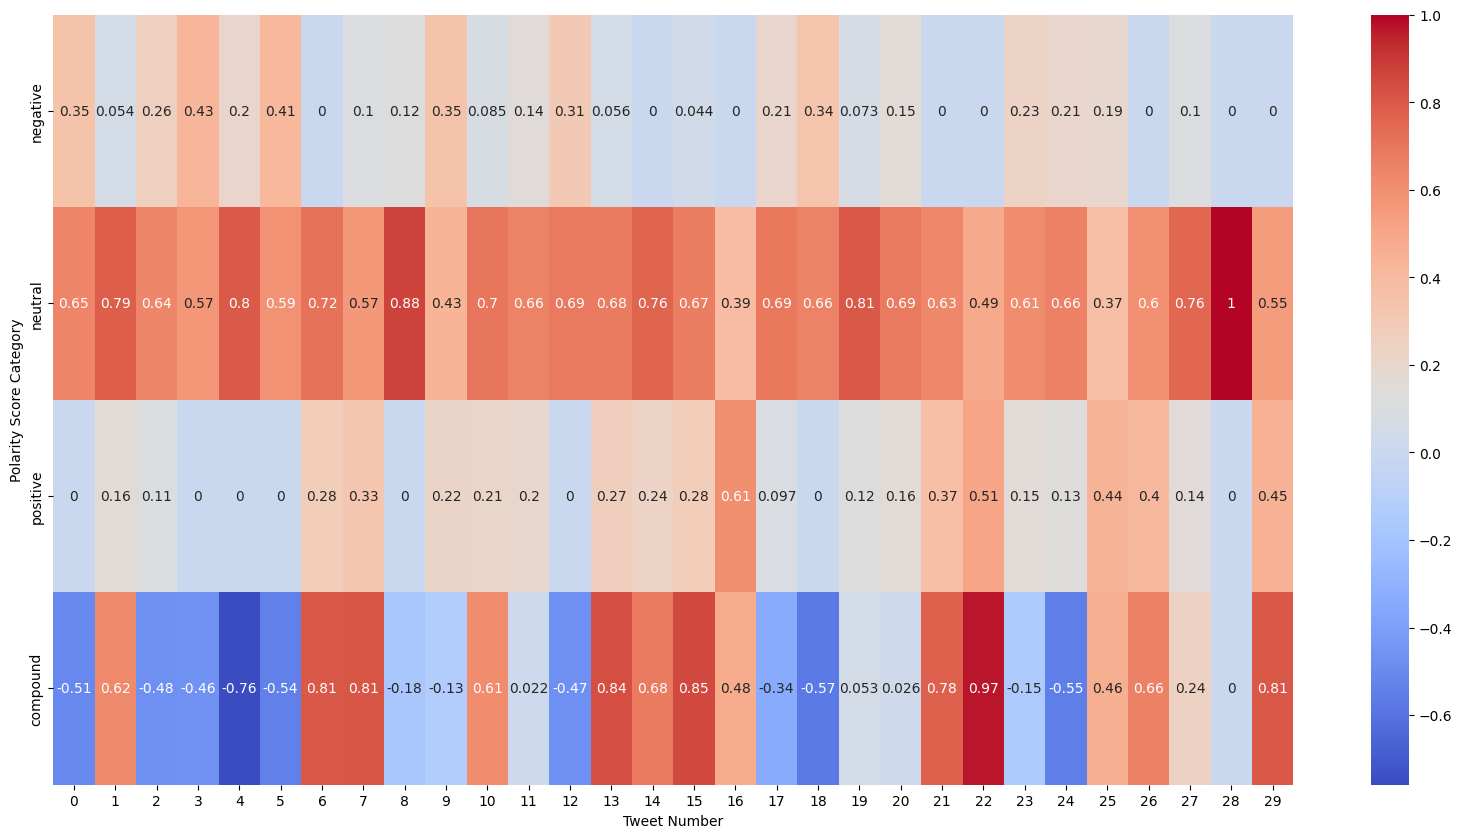

In [240]:
pscore_array = [neg, neu, pos, comp]

plt.figure(figsize=(20,10))
sns.heatmap(np_array,cmap = 'coolwarm',annot= True)

plt.xlabel("Tweet Number")
plt.ylabel("Polarity Score Category")

MORE DATA CLEANING

GET RID OF CAPITAL LETTERS

In [241]:
# Let's replace capital letters to lowercase letters for better accuracy and cleaner data
emotion_data['text'] = emotion_data['text'].str.lower()
emotion_data.head()

,text,label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4


In [242]:
stop_words = set(stopwords.words('english'))
stop_words.remove('not')
#stop_words

REMOVE STOPWORDS FOR CLEANER AND SIMPLER OUTPUTS

In [243]:
stop_words = stopwords.words('english')
emotion_data["text"] = emotion_data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

emotion_data.head()

,text,label
0,feel really helpless heavy hearted,4
1,ive enjoyed able slouch relax unwind frankly n...,0
2,gave internship dmrg feeling distraught,4
3,dont know feel lost,0
4,kindergarten teacher thoroughly weary job take...,4


In [244]:
#sad 0
# joy 1
# love 2
# anger 3
# fear 4
# surprised 5

sad = []
joy = []
love = []
anger = []
fear = []
suprise = []


for i in range(len(emotion_data.text)):
    if(emotion_data.label[i] == 0):
        split_w = emotion_data.text[i].split()
        for j in split_w:
            sad.append(j)
    
    if(emotion_data.label[i] == 1):
        split_w = emotion_data.text[i].split()
        for j in split_w:
            joy.append(j)
            
    if(emotion_data.label[i] == 2):
        split_w = emotion_data.text[i].split()
        for j in split_w:
            love.append(j)
        
    if(emotion_data.label[i] == 3):
        split_w = emotion_data.text[i].split()
        for j in split_w:
            anger.append(j)
    
    if(emotion_data.label[i] == 4):
        split_w = emotion_data.text[i].split()
        for j in split_w:
            fear.append(j)

    if(emotion_data.label[i] == 5):
        split_w = emotion_data.text[i].split()
        for j in split_w:
            suprise.append(j)
        

#joy




In [245]:
sad_dict = {}
joy_dict = {}
love_dict = {}
anger_dict = {}
fear_dict = {}
suprise_dict = {}

for i in sad:
    if i in sad_dict:
        sad_dict[i] += 1
    else:
        sad_dict[i] = 1

for j in joy:
    if j in joy_dict:
        joy_dict[j] += 1
    else:
        joy_dict[j] = 1


for k in love:
    if k in love_dict:
        love_dict[k] += 1
    else:
        love_dict[k] = 1
        
for l in anger:
    if l in anger_dict:
        anger_dict[l] += 1
    else:
        anger_dict[l] = 1

for l in fear:
    if l in fear_dict:
        fear_dict[l] += 1
    else:
        fear_dict[l] = 1

for m in suprise:
    if m in suprise_dict:
        suprise_dict[m] += 1
    else:
        suprise_dict[m] = 1




sad_dict = dict(sorted(sad_dict.items(), key=lambda item: item[1], reverse=True))
joy_dict = dict(sorted(joy_dict.items(), key=lambda item: item[1], reverse=True))
love_dict = dict(sorted(love_dict.items(), key=lambda item: item[1], reverse=True))
anger_dict = dict(sorted(anger_dict.items(), key=lambda item: item[1], reverse=True))
fear_dict = dict(sorted(fear_dict.items(), key=lambda item: item[1], reverse=True))
suprise_dict = dict(sorted(suprise_dict.items(), key=lambda item: item[1], reverse=True))


#anger_dict

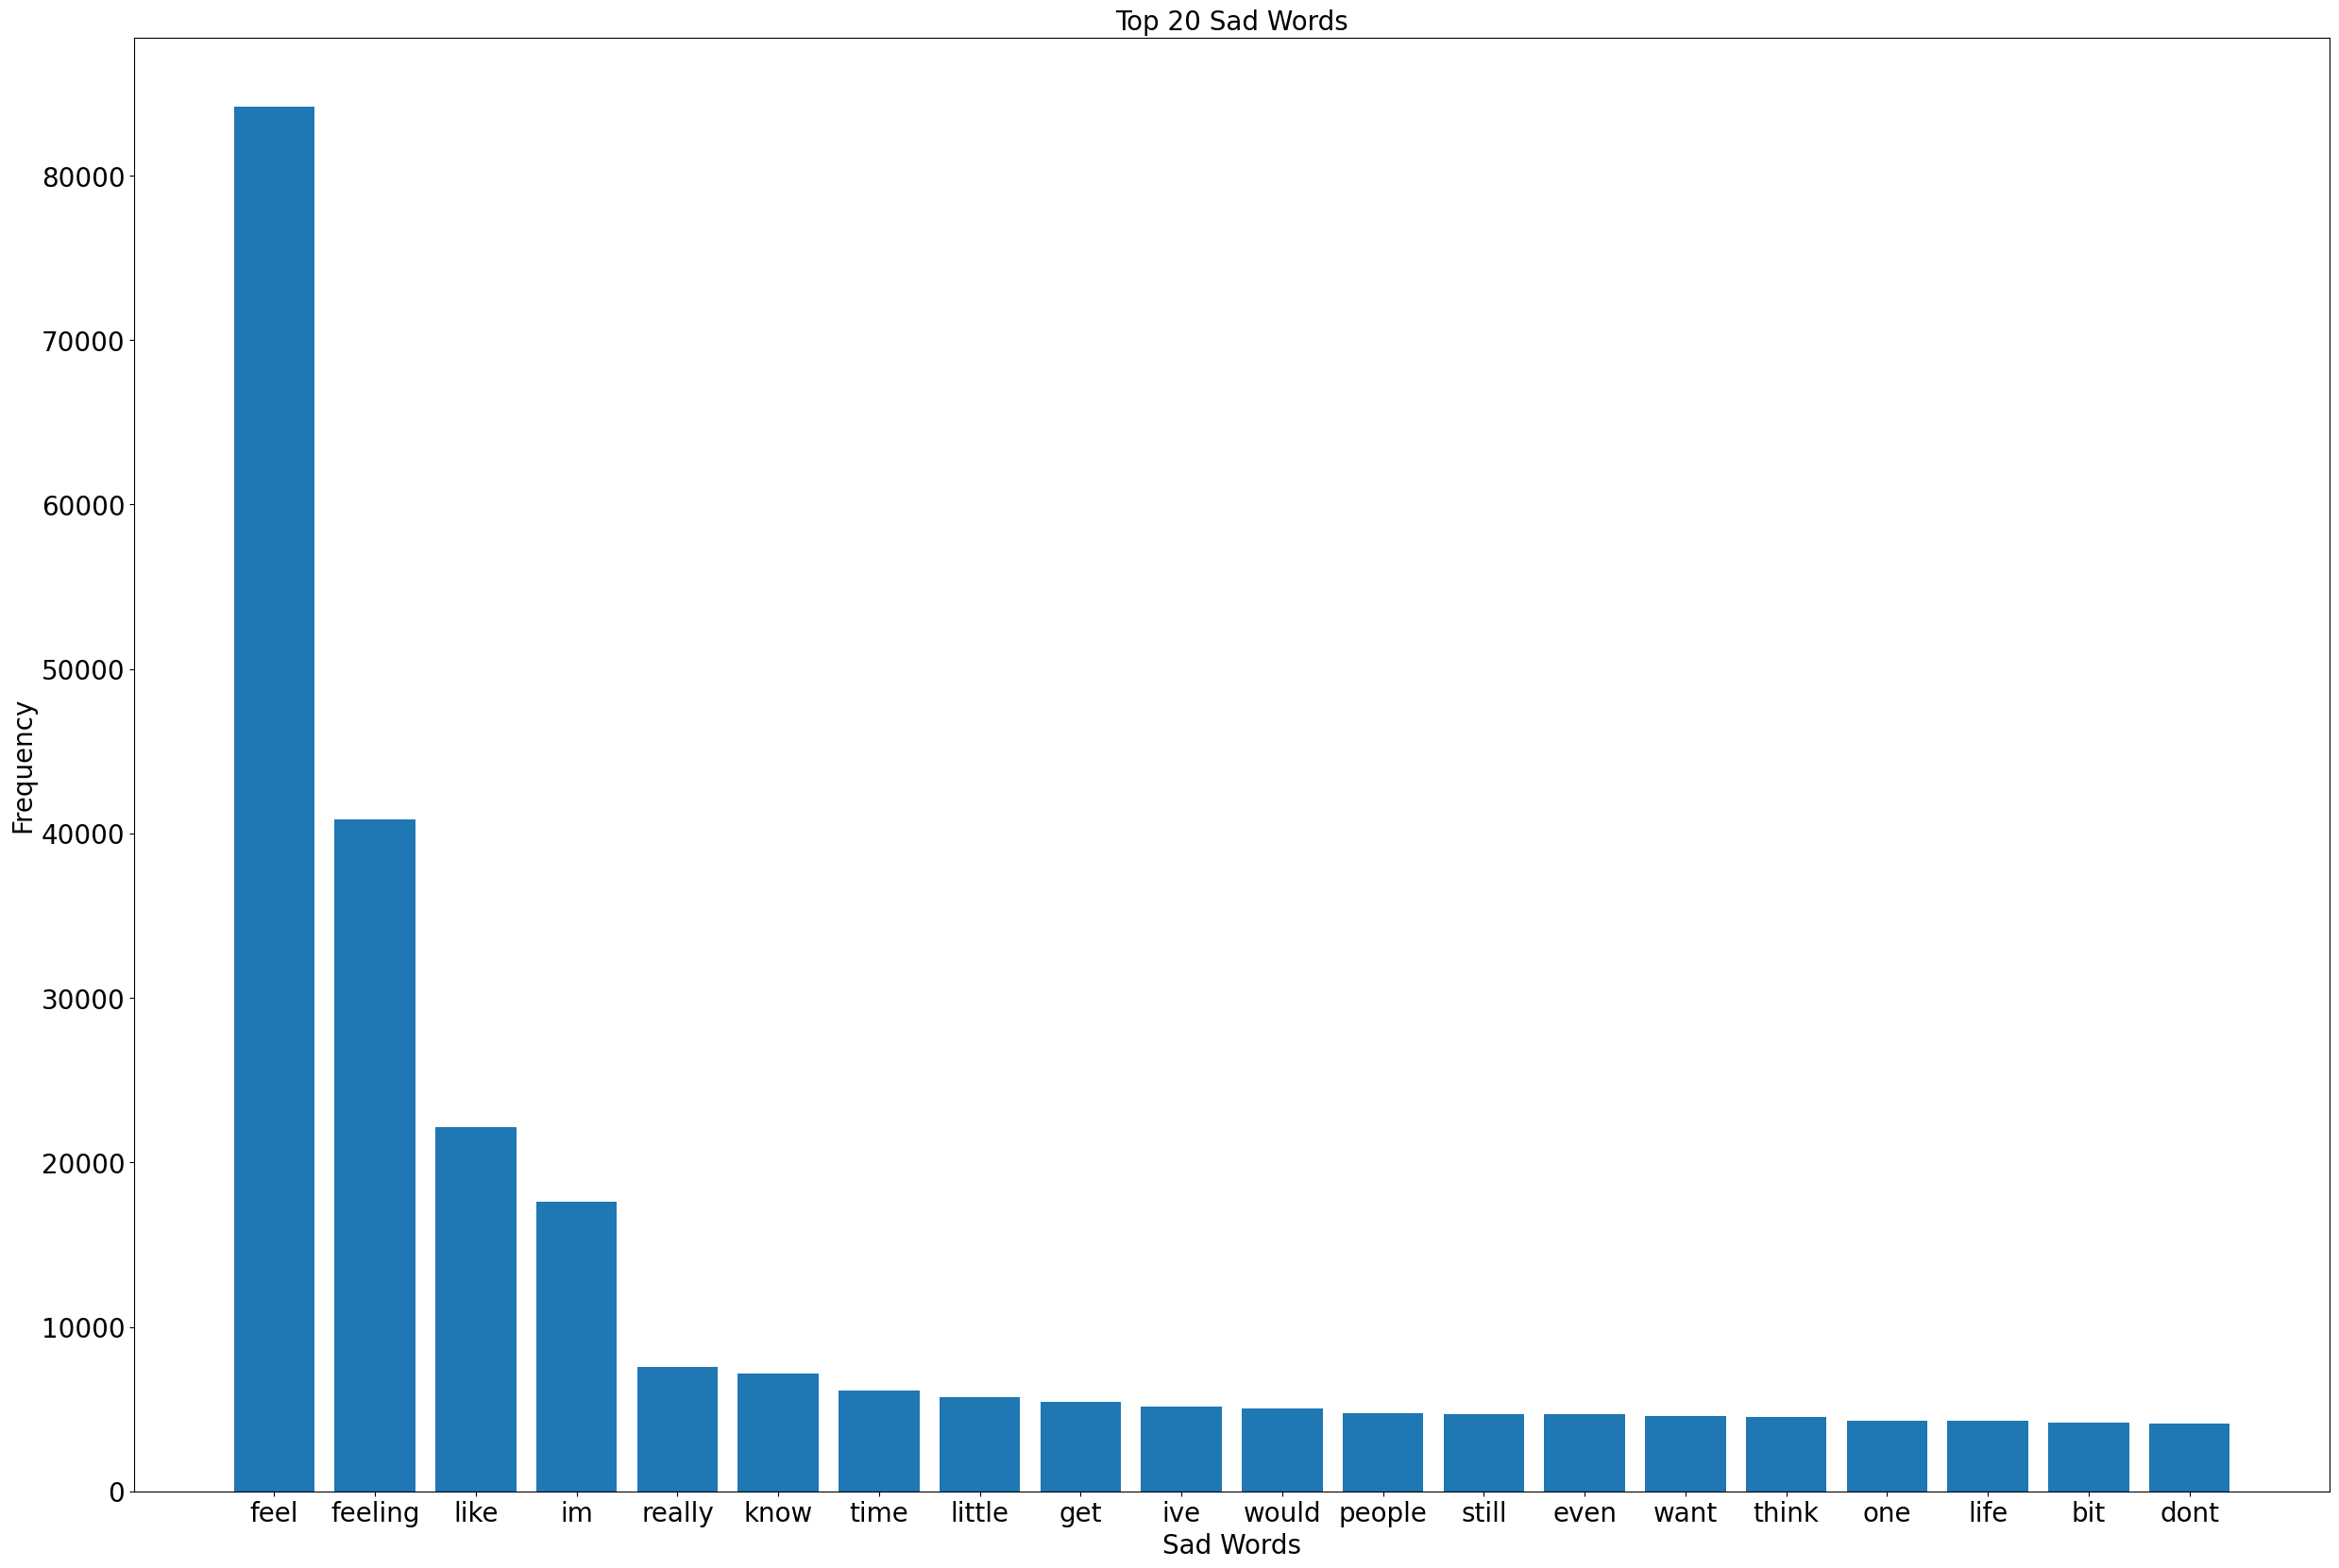

In [246]:
x = list(sad_dict.keys())[:20]
y = [value for key, value in list(sad_dict.items())[:20]]

plt.figure(figsize=(30,20))

plt.bar(x,y)
plt.xticks(fontsize=20)

plt.xlabel("Sad Words", fontsize=20)

plt.ylabel("Frequency", fontsize=20)

plt.yticks(fontsize=20)
plt.title("Top 20 Sad Words", fontsize=20)

plt.show()


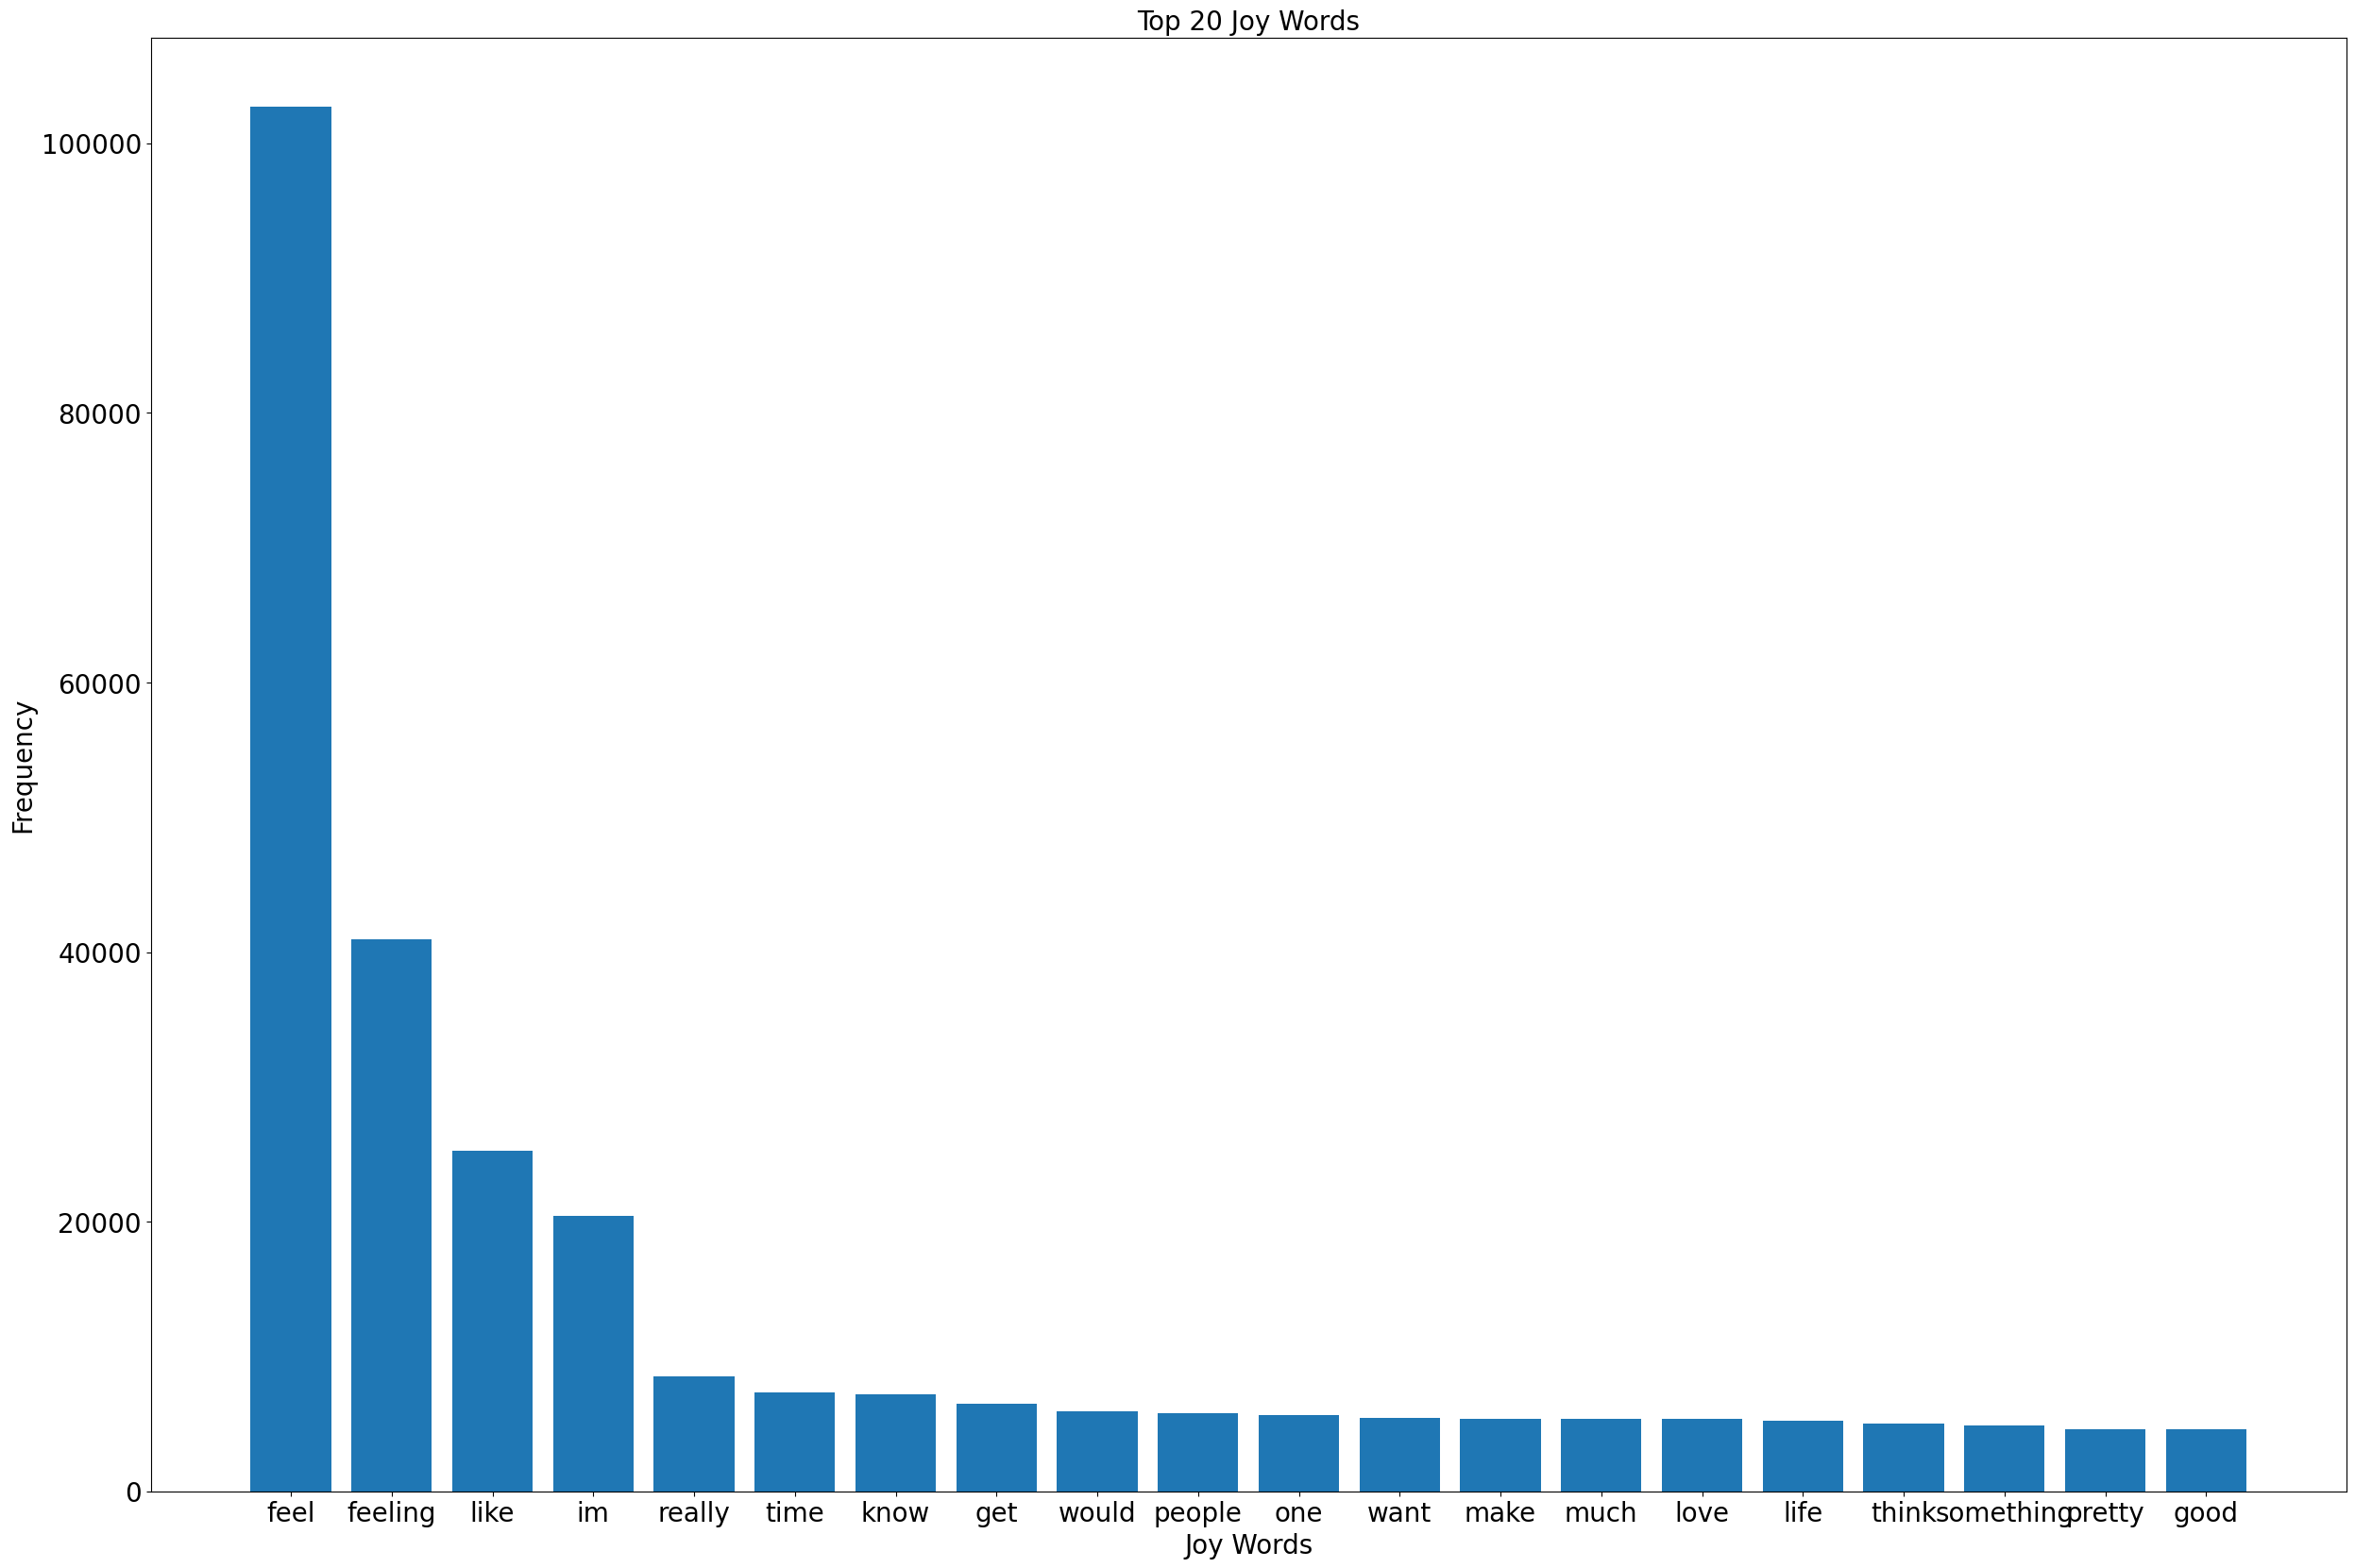

In [247]:
x1 = list(joy_dict.keys())[:20]
y1 = [value for key, value in list(joy_dict.items())[:20]]

plt.figure(figsize=(30,20))
plt.bar(x1,y1)
plt.xlabel("Joy Words",fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plt.yticks(fontsize=20)
plt.title("Top 20 Joy Words",fontsize=20)
plt.show()

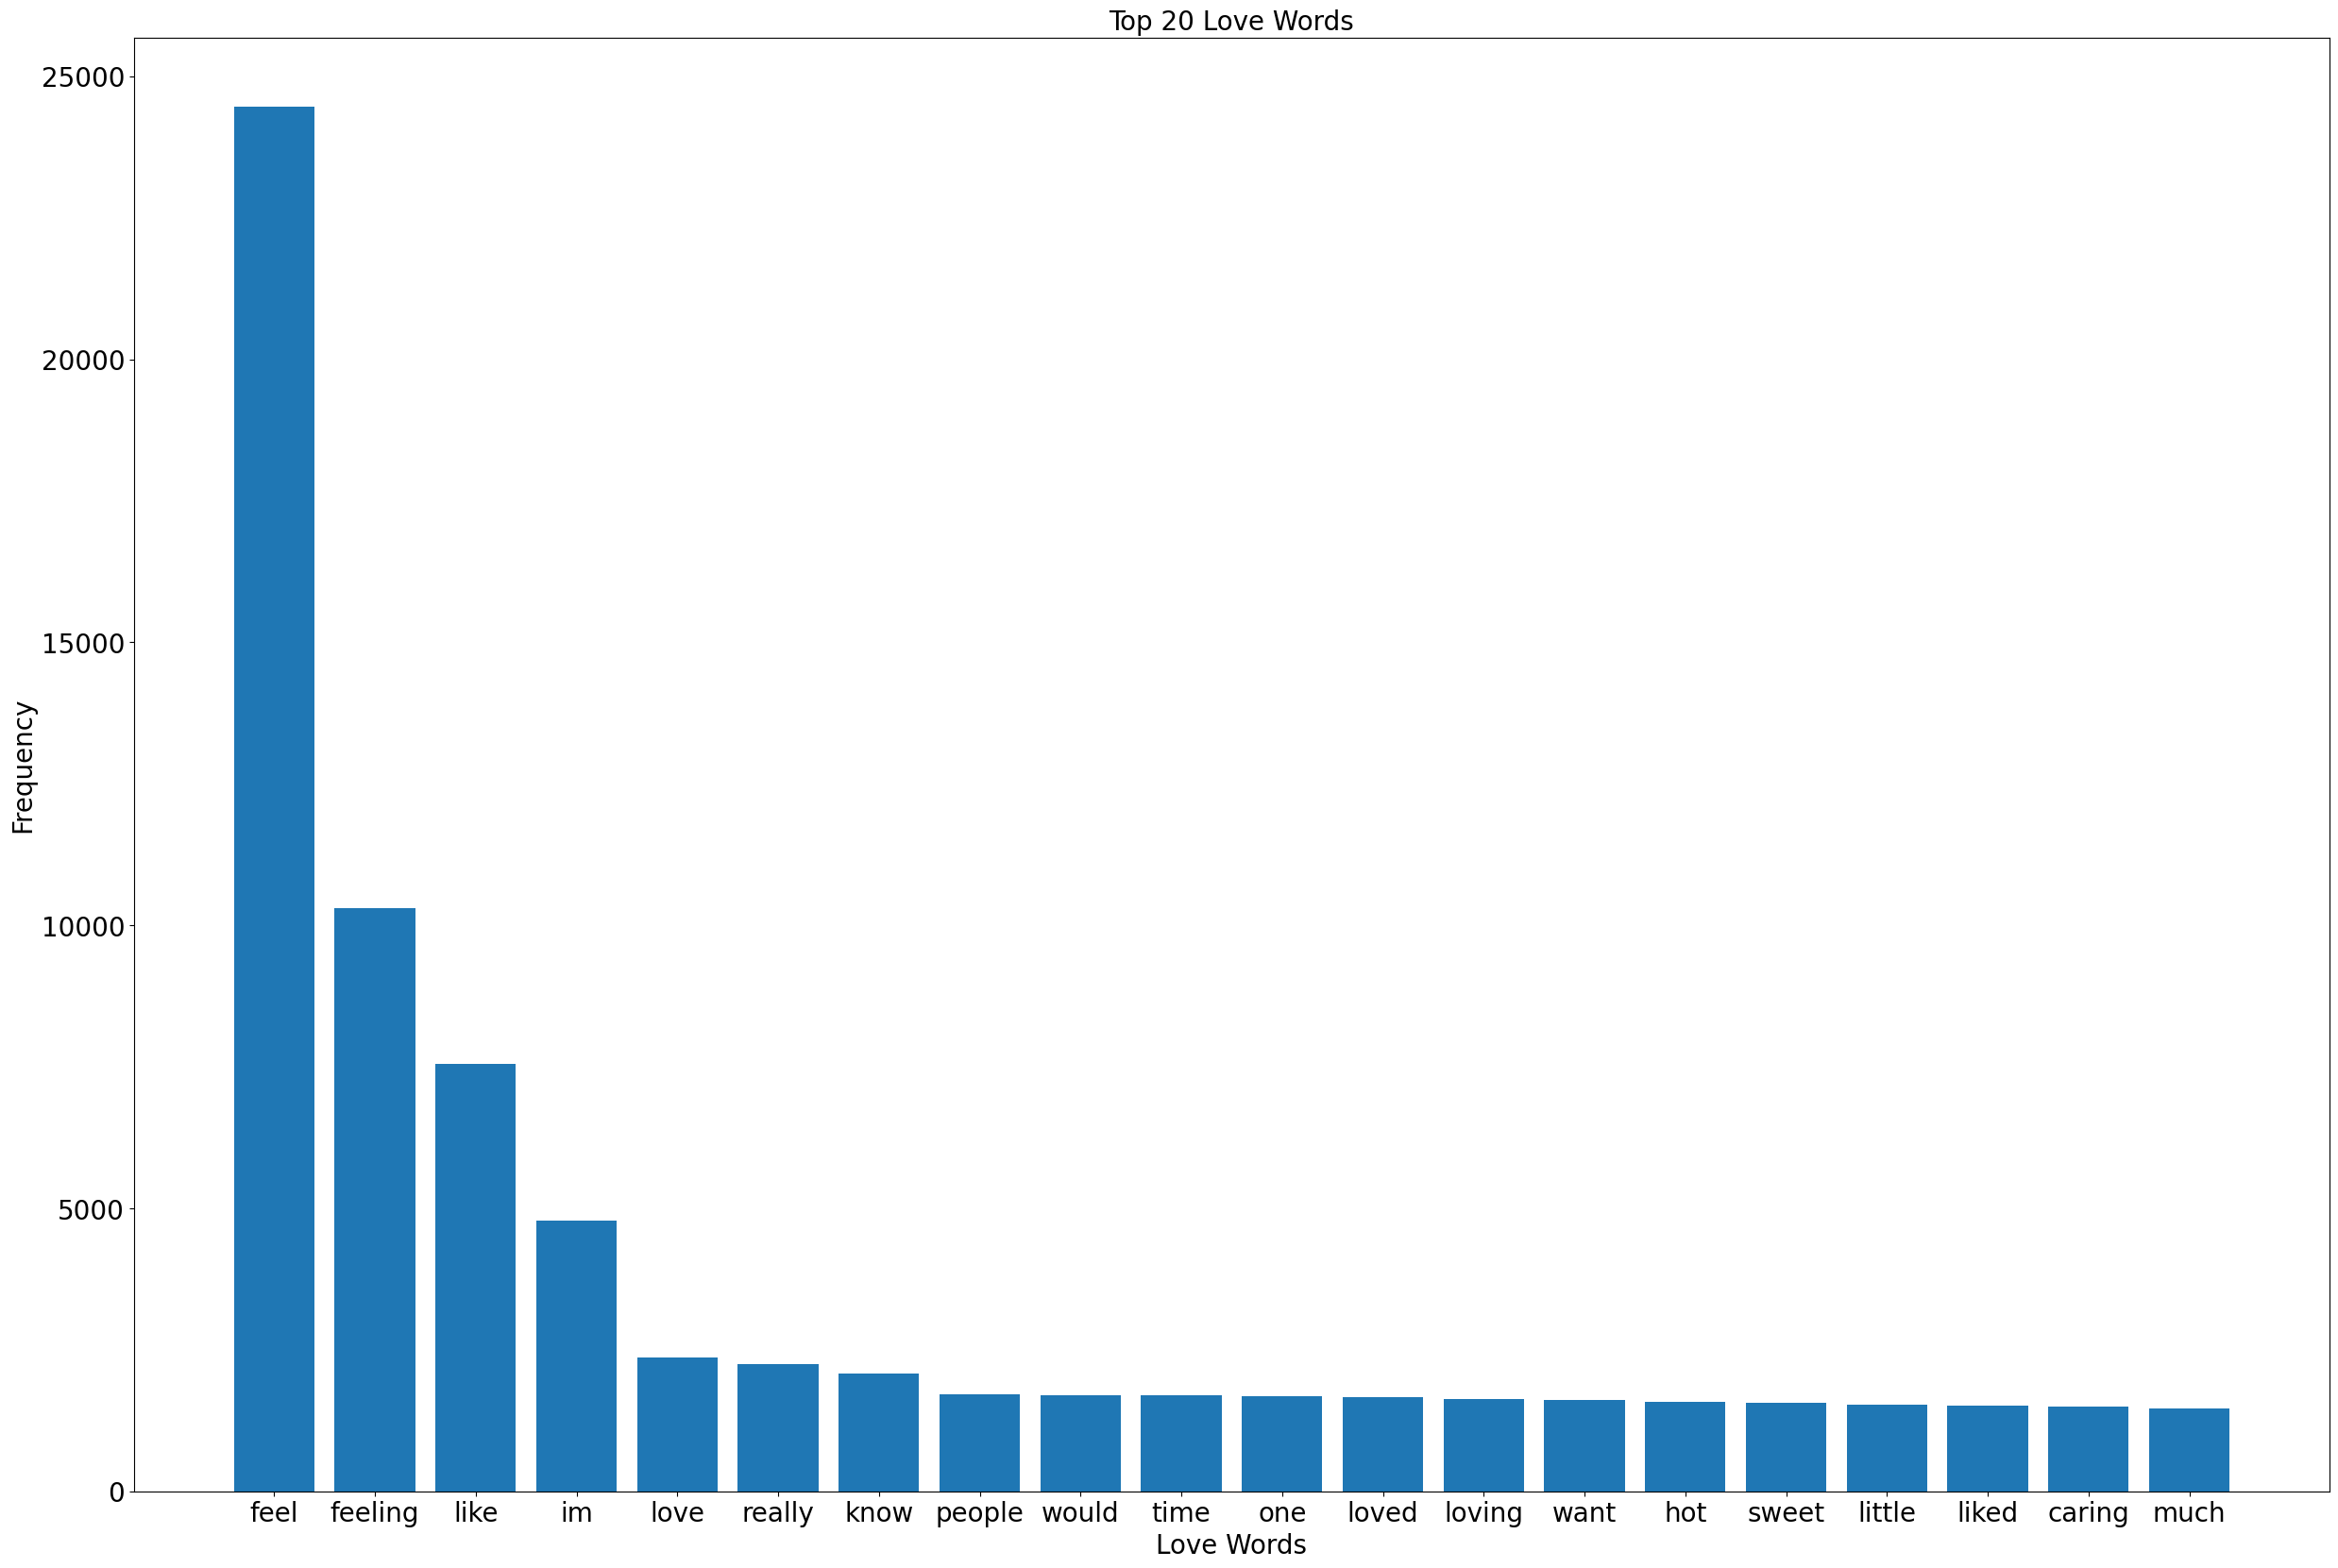

In [248]:
x2 = list(love_dict.keys())[:20]
y2 = [value for key, value in list(love_dict.items())[:20]]

plt.figure(figsize=(30,20))
plt.bar(x2,y2)
plt.xlabel("Love Words",fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel("Frequency",fontsize=20)
plt.yticks(fontsize=20)
plt.title("Top 20 Love Words",fontsize=20)
plt.show()

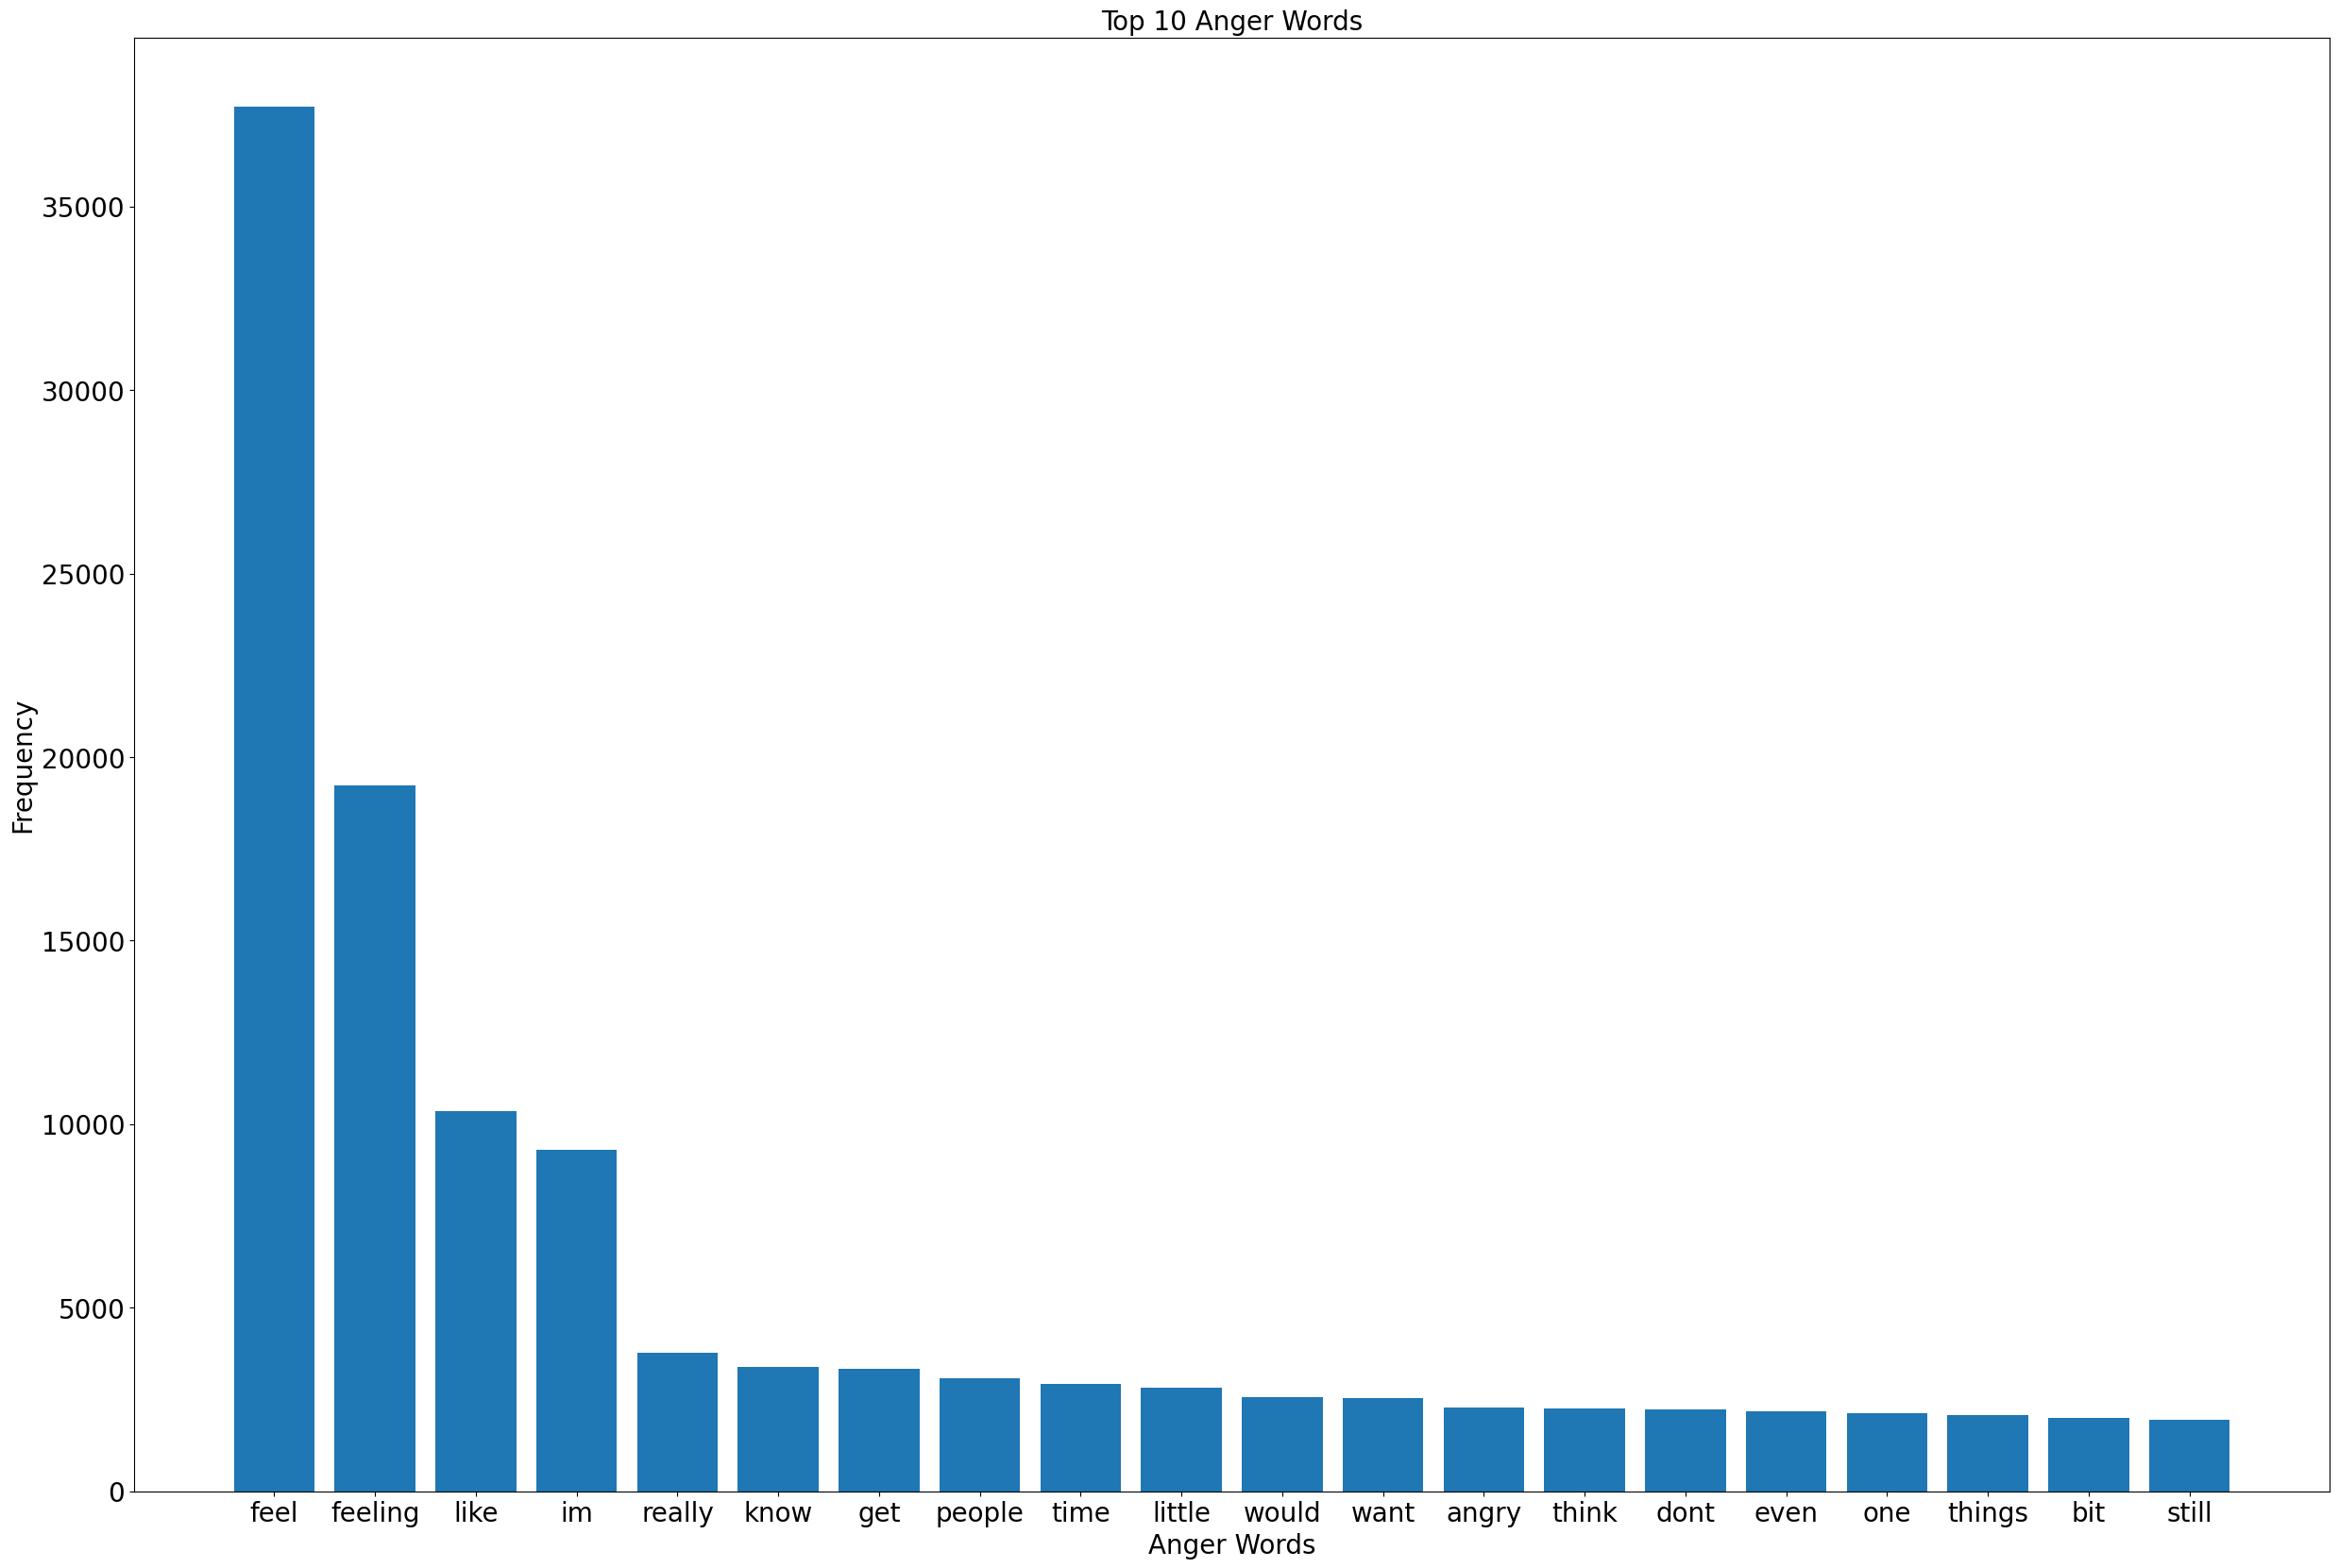

In [249]:
x3 = list(anger_dict.keys())[:20]
y3 = [value for key, value in list(anger_dict.items())[:20]]

plt.figure(figsize=(30,20))
plt.bar(x3,y3)
plt.xlabel("Anger Words",fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel("Frequency",fontsize=20)
plt.yticks(fontsize=20)
plt.title("Top 10 Anger Words",fontsize=20)
plt.show()

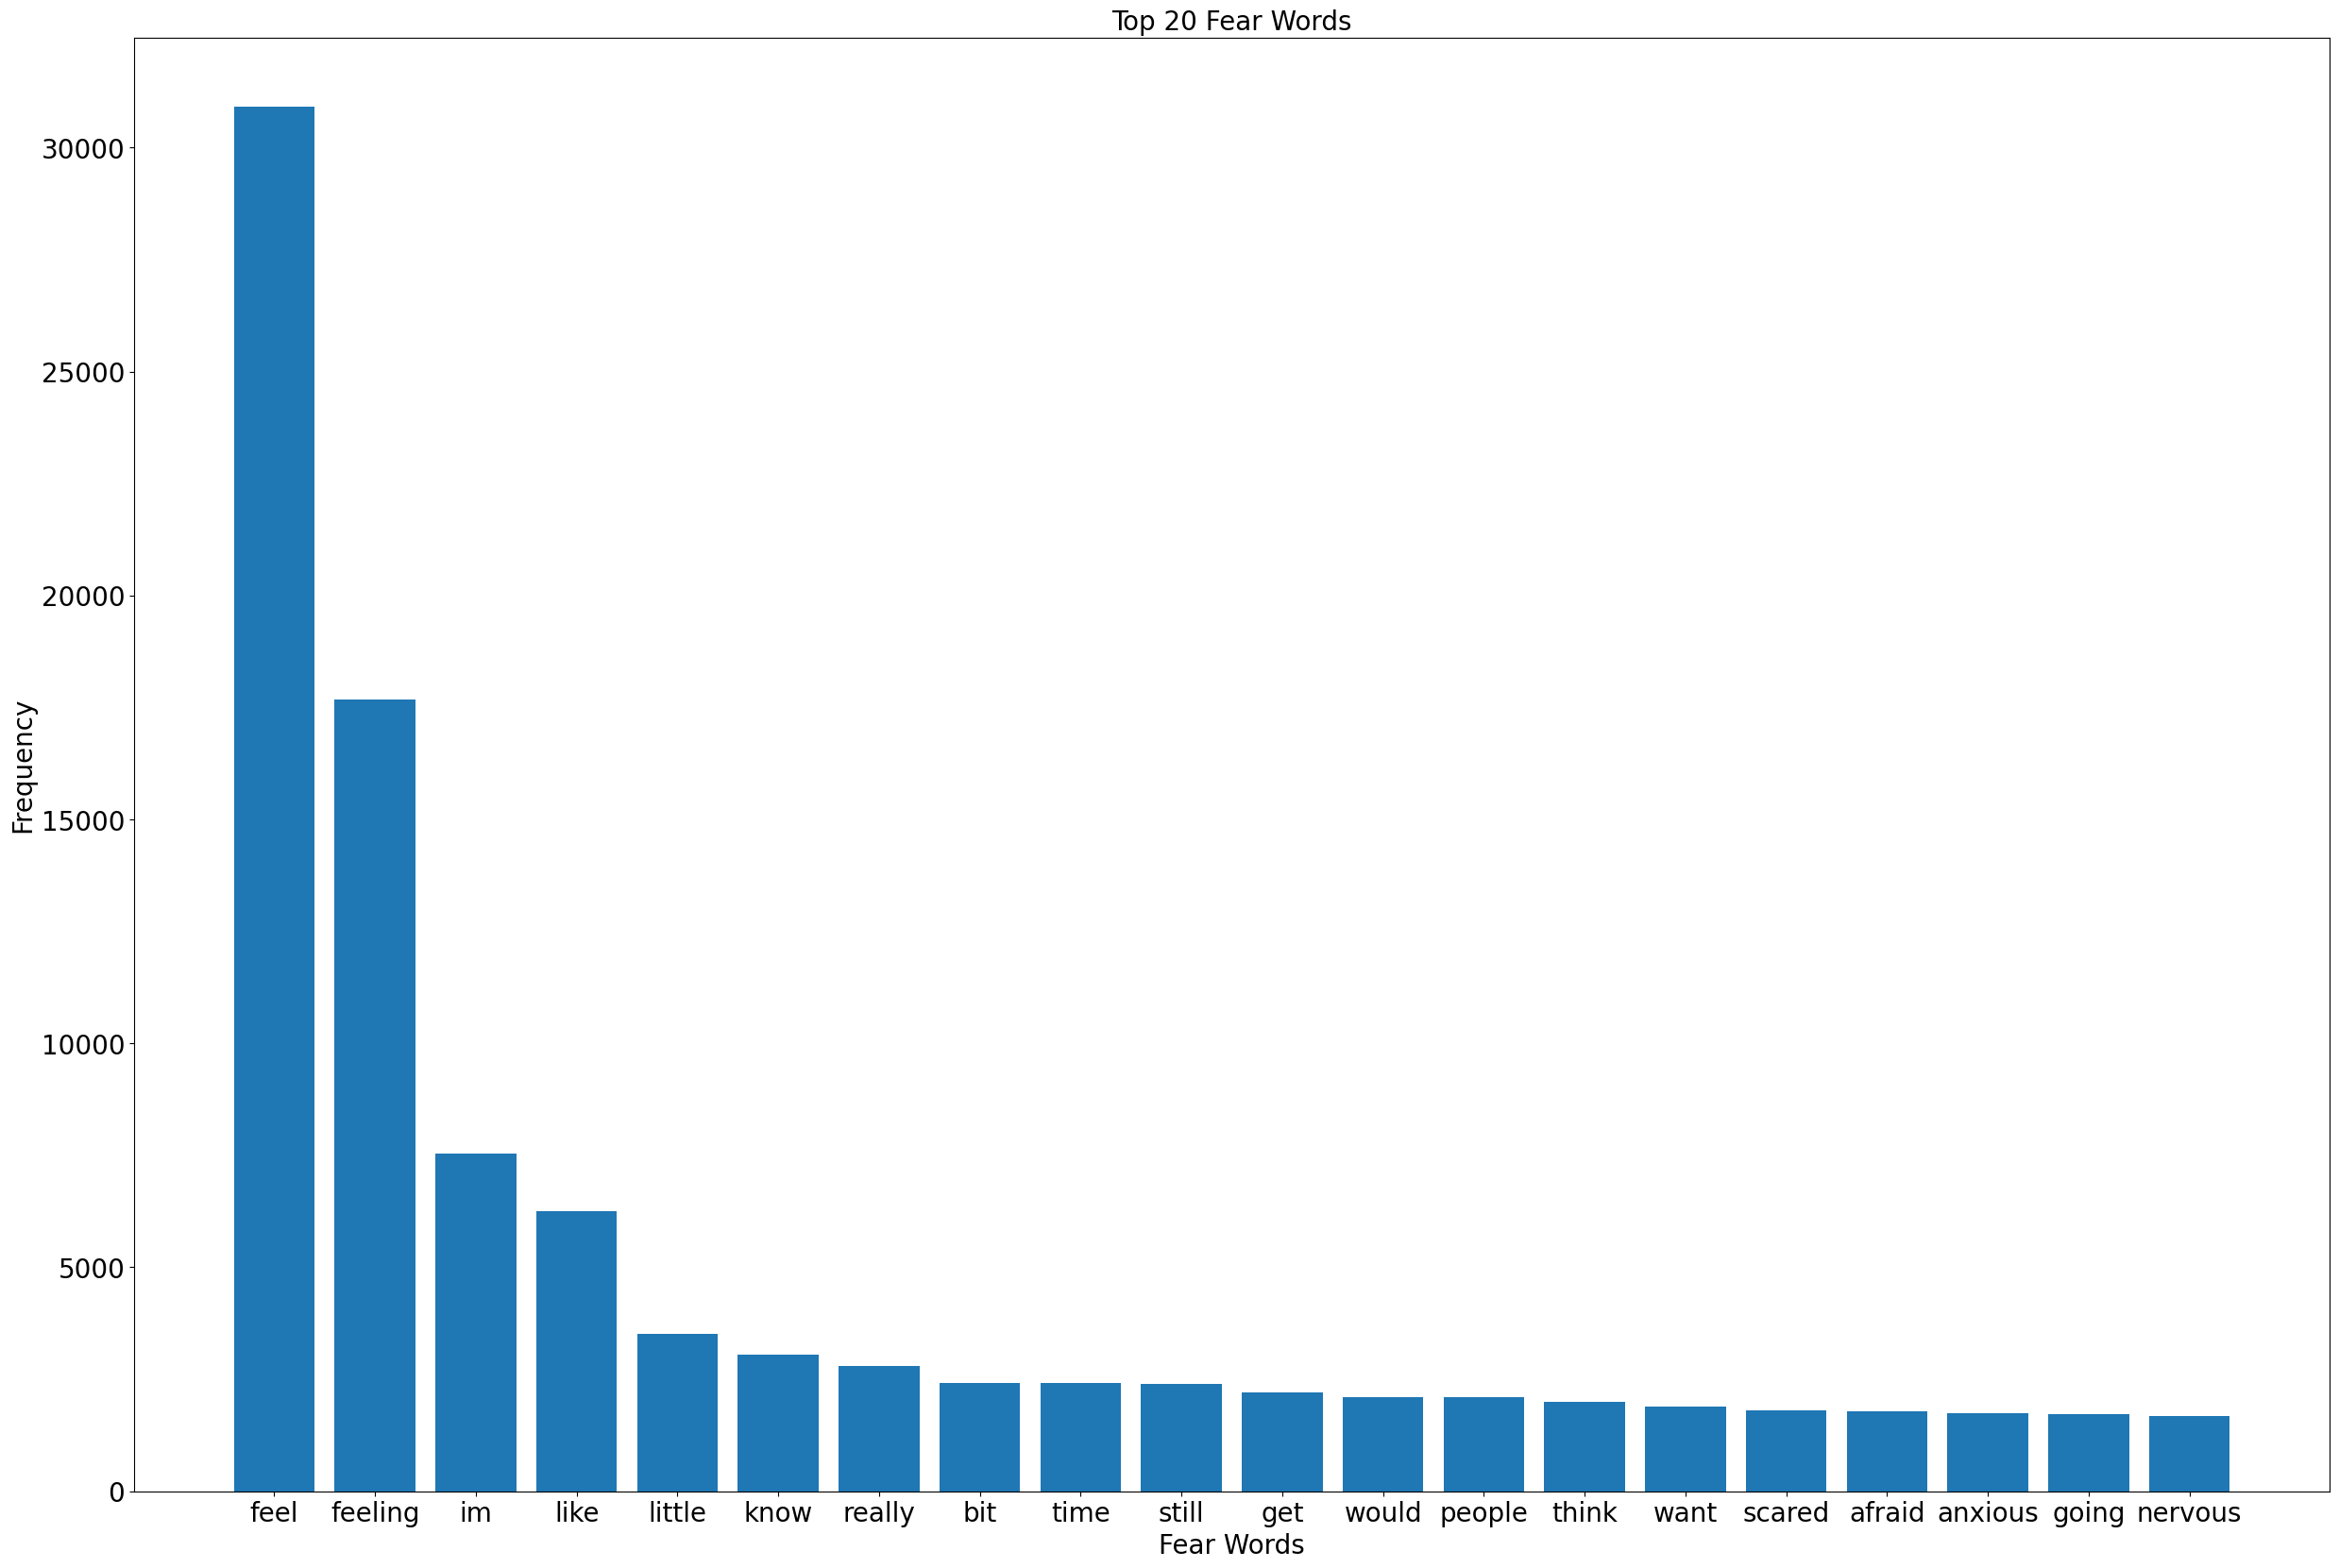

In [250]:
x4 = list(fear_dict.keys())[:20]
y4 = [value for key, value in list(fear_dict.items())[:20]]

plt.figure(figsize=(30,20))
plt.bar(x4,y4)
plt.xlabel("Fear Words",fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plt.yticks(fontsize=20)
plt.title("Top 20 Fear Words",fontsize=20)
plt.show()

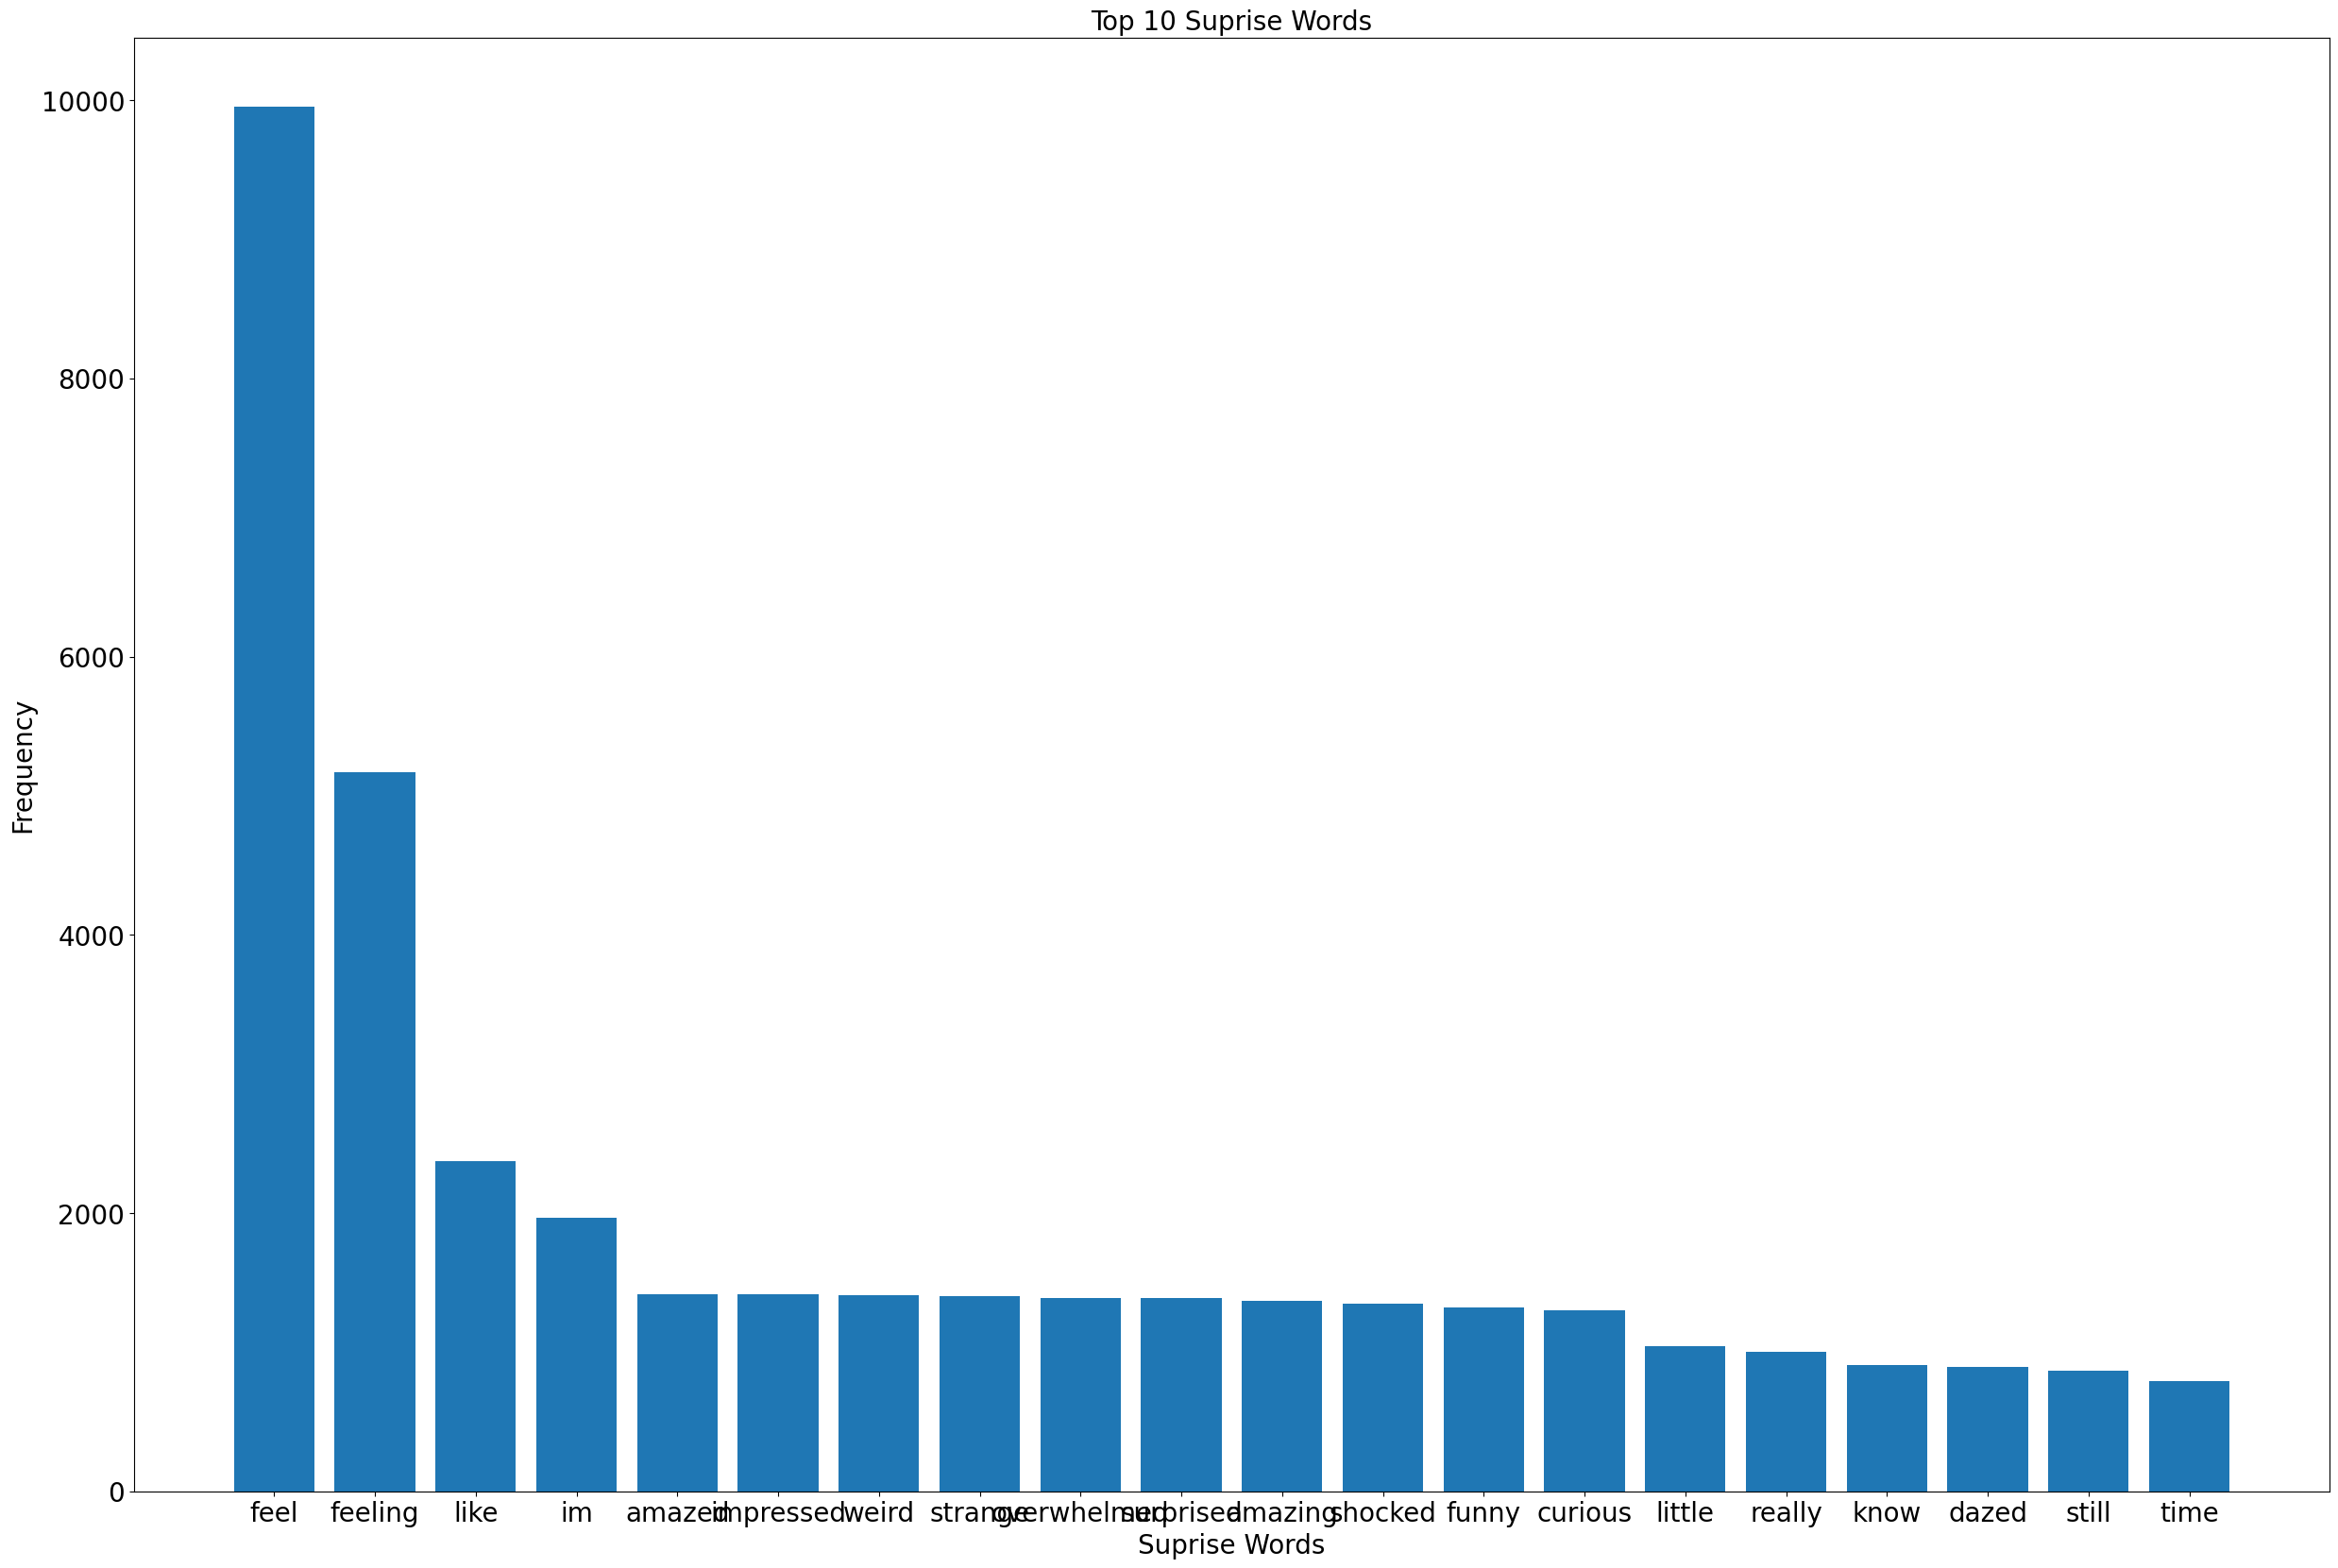

In [251]:
x5 = list(suprise_dict.keys())[:20]
y5 = [value for key, value in list(suprise_dict.items())[:20]]

plt.figure(figsize=(30,20))
plt.bar(x5,y5)
plt.xlabel("Suprise Words",fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel("Frequency",fontsize=20)
plt.yticks(fontsize=20)
plt.title("Top 10 Suprise Words",fontsize=20)
plt.show()

In [252]:
from tensorflow.keras import backend as K
K.clear_session()

TRAIN THE MODEL

TRAIN TEST SPLIT

In [253]:
df1 = emotion_data.copy()

X_train, X_test, y_train, y_test = train_test_split(df1['text'], df1['label'], test_size=0.2, random_state=42)
print(df1)
print(X_train)
print(X_train.ndim)
print(y_train.ndim)

                                                     text  label
0                      feel really helpless heavy hearted      4
1       ive enjoyed able slouch relax unwind frankly n...      0
2                 gave internship dmrg feeling distraught      4
3                                     dont know feel lost      0
4       kindergarten teacher thoroughly weary job take...      4
...                                                   ...    ...
416804  feel like telling horny devils find site suite...      2
416805  began realize feeling agitated restless would ...      3
416806  feel curious previous early dawn time seek tro...      5
416807  feel becuase tyranical nature government el sa...      3
416808  think spent time investigating surroundings th...      5

[416809 rows x 2 columns]
146122    ive blabbed enough tonight im tired ive feelin...
334806    woke really early morning drove feel ecstatic ...
182273    feel never gave rest day megabrick feeling stu...
198898       

TOKENIZE THE STRINGS, MAX 50000 AND MAKE SURE STRINGS GET SPLIT UP AND TOKENIZED

In [254]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

print(X_train.size)
print(X_train.ndim)

333447
1


Pad X_train and X_test so that all strings have the same length of 100

In [255]:
X_train_padded = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=128, padding='post')
X_test_padded = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=128, padding='post')

print(X_train_padded.size)
print(len(X_train_padded))
print(y_train.size)
print(X_train_padded.ndim)
print(y_train.ndim)

42681216
333447
333447
2
1


In [256]:
"""import string
import re
from tensorflow.keras.layers import TextVectorization

# Create a custom standardization function to strip HTML break tags '<br />'.
def custom_standardization(input_data):
  lowercase = tf.strings.lower(input_data)
  stripped_html = tf.strings.regex_replace(lowercase, '<br />', ' ')
  return tf.strings.regex_replace(stripped_html,
                                  '[%s]' % re.escape(string.punctuation), '')

vectorize_layer = TextVectorization(
    standardize=custom_standardization,
    max_tokens=50000,
    output_mode='int',
    output_sequence_length=100)

text_ds = X_train.map(lambda x: x)
vectorize_layer.adapt(text_ds)"""

"import string\nimport re\nfrom tensorflow.keras.layers import TextVectorization\n\n# Create a custom standardization function to strip HTML break tags '<br />'.\ndef custom_standardization(input_data):\n  lowercase = tf.strings.lower(input_data)\n  stripped_html = tf.strings.regex_replace(lowercase, '<br />', ' ')\n  return tf.strings.regex_replace(stripped_html,\n                                  '[%s]' % re.escape(string.punctuation), '')\n\nvectorize_layer = TextVectorization(\n    standardize=custom_standardization,\n    max_tokens=50000,\n    output_mode='int',\n    output_sequence_length=100)\n\ntext_ds = X_train.map(lambda x: x)\nvectorize_layer.adapt(text_ds)"

BUILD CNN LAYERS

In [257]:
model = Sequential([
    Embedding(input_dim=50000, output_dim=16, name="embedding"),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    GlobalMaxPooling1D(),
    #Conv1D(filters=128, kernel_size=5, activation='relu'),
    #GlobalMaxPooling1D(),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(6, activation='softmax'),
])

#model.add(layers.Flatten())
#model.add(layers.Dense(10))

"""model = Sequential([
    #Dense(units=64, activation='relu', input_shape=[128]),
    Embedding(input_dim=50000, output_dim=16, name="embedding"),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(units=64, activation='relu'),
    Dense(units=6, activation='softmax'),
])"""

'model = Sequential([\n    #Dense(units=64, activation=\'relu\', input_shape=[128]),\n    Embedding(input_dim=50000, output_dim=16, name="embedding"),\n    Conv1D(filters=128, kernel_size=5, activation=\'relu\'),\n    GlobalMaxPooling1D(),\n    Dense(units=64, activation=\'relu\'),\n    Dense(units=6, activation=\'softmax\'),\n])'

In [258]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ ?                      │   0 (unbuilt) │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [259]:
#plot_model(model, to_file='model.png')

In [260]:
callback = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

model_history = model.fit(X_train_padded, y_train, epochs=50, validation_data=(X_test_padded, y_test), callbacks=[callback])

Epoch 1/50
10421/10421 ━━━━━━━━━━━━━━━━━━━━ 30s 3ms/step - accuracy: 0.8535 - loss: 0.3574 - val_accuracy: 0.9347 - val_loss: 0.1141
Epoch 2/50
10421/10421 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - accuracy: 0.9345 - loss: 0.1136 - val_accuracy: 0.9357 - val_loss: 0.1047
Epoch 3/50
10421/10421 ━━━━━━━━━━━━━━━━━━━━ 30s 3ms/step - accuracy: 0.9384 - loss: 0.1011 - val_accuracy: 0.9353 - val_loss: 0.1027
Epoch 4/50
10421/10421 ━━━━━━━━━━━━━━━━━━━━ 29s 3ms/step - accuracy: 0.9399 - loss: 0.0965 - val_accuracy: 0.9366 - val_loss: 0.1023
Epoch 5/50
10421/10421 ━━━━━━━━━━━━━━━━━━━━ 30s 3ms/step - accuracy: 0.9401 - loss: 0.0938 - val_accuracy: 0.9355 - val_loss: 0.1033
Epoch 6/50
10421/10421 ━━━━━━━━━━━━━━━━━━━━ 30s 3ms/step - accuracy: 0.9410 - loss: 0.0909 - val_accuracy: 0.9358 - val_loss: 0.1029
Epoch 7/50
10421/10421 ━━━━━━━━━━━━━━━━━━━━ 30s 3ms/step - accuracy: 0.9419 - loss: 0.0896 - val_accuracy: 0.9359 - val_loss: 0.1027


RESULTS VISUALIZATION

In [261]:
result = model.evaluate(X_test_padded, y_test)

print("Test Loss:", result[0])
print("Test Accuracy:", result[1])

2606/2606 ━━━━━━━━━━━━━━━━━━━━ 1s 551us/step - accuracy: 0.9364 - loss: 0.1039
Test Loss: 0.10226840525865555
Test Accuracy: 0.9366257786750793


In [262]:
y_pred = np.argmax(model.predict(X_test_padded), axis=1)

2606/2606 ━━━━━━━━━━━━━━━━━━━━ 2s 580us/step


In [263]:
target = ['Sadness', 'Joy', 'Love', 'Anger', 'Fear', 'Surprise']  
report = classification_report(y_test, y_pred, target_names=target)

print(report)

              precision    recall  f1-score   support

     Sadness       0.95      0.99      0.97     24201
         Joy       0.94      0.97      0.95     28164
        Love       0.91      0.77      0.84      6929
       Anger       0.97      0.91      0.94     11441
        Fear       0.95      0.84      0.89      9594
    Surprise       0.74      0.96      0.84      3033

    accuracy                           0.94     83362
   macro avg       0.91      0.91      0.91     83362
weighted avg       0.94      0.94      0.94     83362



In [264]:
"""prediction_test = model.predict(X_test)
print("y_test vs prediction")
print("MAE: ", mean_absolute_error(prediction_test, y_test))

prediction_score = model.score(X_test, y_test)
print("Accuracy: ", prediction_score)

fig, ax = plt.subplots(figsize=(9, 6))
y_test_arr = np.array(y_test)
plt.plot(y_test_arr[-50:], marker='o', label='y_test')
plt.plot(prediction_test[-50:], marker='o', label='prediction')
plt.title('y_test vs prediction')
plt.legend()
plt.show()"""

'prediction_test = model.predict(X_test)\nprint("y_test vs prediction")\nprint("MAE: ", mean_absolute_error(prediction_test, y_test))\n\nprediction_score = model.score(X_test, y_test)\nprint("Accuracy: ", prediction_score)\n\nfig, ax = plt.subplots(figsize=(9, 6))\ny_test_arr = np.array(y_test)\nplt.plot(y_test_arr[-50:], marker=\'o\', label=\'y_test\')\nplt.plot(prediction_test[-50:], marker=\'o\', label=\'prediction\')\nplt.title(\'y_test vs prediction\')\nplt.legend()\nplt.show()'

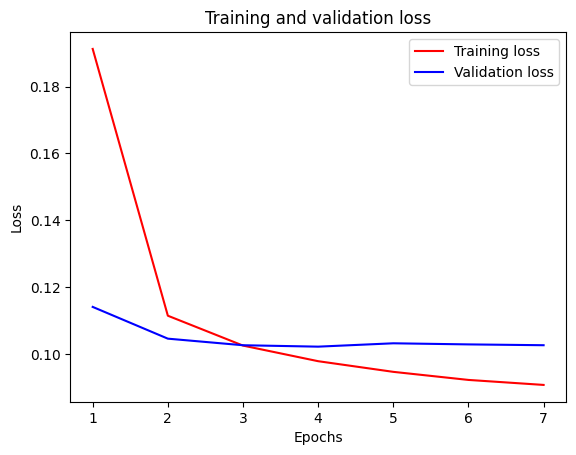

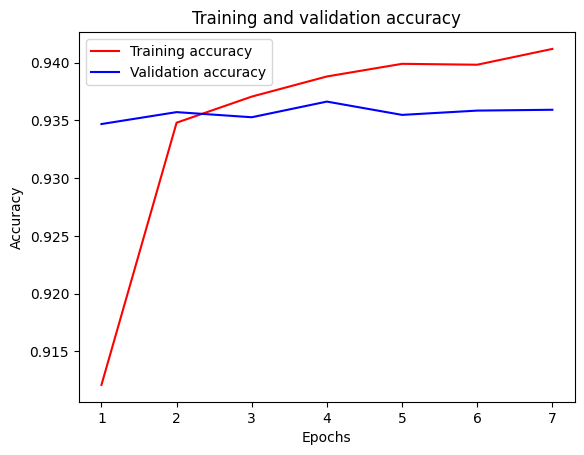

In [268]:
train_loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
train_acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']

epochs = range(1, len(train_acc) + 1)

plt.plot(epochs, train_loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure()
plt.plot(epochs, train_acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()